## Importing Dependencies

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px

## Config

In [44]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")

[]

In [45]:
OHCO = ['artist', 'song','lines', 'token_num']
bags = dict(
    WORDS = OHCO[:4],
    LINES = OHCO[:3],
    SONG = OHCO[:2],
    ARTIST = OHCO[:1]
)

In [46]:
bag = 'ARTIST'

## Prepare the Data

In [141]:
TOKEN = pd.read_csv('tokens.csv')
VOCAB = pd.read_csv('vocab.csv')
LIB = pd.read_csv('lib.csv')

## Creating BOW from Token

In [48]:
BOW = TOKEN.groupby(bags[bag]+['term_str']).term_str.count().to_frame('n') 

In [49]:
BOW

n
artist          term_str     
ADELE           92cause     1
                a         187
                able        1
                about      11
                above       4
...                       ...
WHITNEY HOUSTON yours       6
                yourself    3
                yuletide    1
                z           2
                zone        1

[8218 rows x 1 columns]

In [51]:
DTCM = BOW.n.unstack(fill_value=0)

In [52]:
DTCM.head(10)

term_str,1,10,130,14,16,180,2,20,2020,213,...,yourself,youu8197,youu8287,youuc0u8197,youuc0u8287,yuh,yuletide,z,zion,zone
artist,,,,,,,,,,,,,,,,,,,,,
ADELE,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
AMY WINEHOUSE,0,0,0,1,0,1,0,0,0,0,...,16,0,0,0,0,0,0,0,0,0
ARIANA GRANDE,0,0,1,0,0,0,0,0,1,0,...,3,0,0,0,0,27,0,0,0,0
BEYONCE,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CYNDI LAUPER,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DOLLY PARTON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DUA LIPA,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LAURYN HILL,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
PINK,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
DTCM.sum()

term_str
1            2
10           2
130          1
14           1
16           1
            ..
yuh         27
yuletide     1
z            2
zion         1
zone         1
Length: 4184, dtype: int64

In [54]:
LIB.columns = ['artist', 'nationality', 'genre', 'decade_of_prominence', 'birth_year',
       'instruments']
LIB.columns

Index(['artist', 'nationality', 'genre', 'decade_of_prominence', 'birth_year',
       'instruments'],
      dtype='object')

In [65]:
DOC = DTCM.sum(1).to_frame('n_tokens')
DOC['n_types'] = DTCM.astype('bool').sum(1)
DOC['pkr'] = DOC.n_types / DOC.n_tokens
DOC = DOC.join(LIB[['nationality', 'genre', 'decade_of_prominence', 'birth_year',
       'instruments']])

In [61]:
#LIB = LIB.set_index('artist')
LIB

,nationality,genre,decade_of_prominence,birth_year,instruments
artist,,,,,
ADELE,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']"
AMY WINEHOUSE,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']"
ARIANA GRANDE,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']"
BEYONCE,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']"
CYNDI LAUPER,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']"
DOLLY PARTON,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']"
DUA LIPA,British,"Dance-pop, Pop",2020s,1995,['Vocals']
LAURYN HILL,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']"
PINK,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']"


In [66]:
DOC

,n_tokens,n_types,pkr,nationality,genre,decade_of_prominence,birth_year,instruments
artist,,,,,,,,
ADELE,16539,1302,0.078723,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']"
AMY WINEHOUSE,10892,1447,0.132850,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']"
ARIANA GRANDE,15441,1299,0.084127,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']"
BEYONCE,108,93,0.861111,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']"
CYNDI LAUPER,134,95,0.708955,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']"
DOLLY PARTON,138,102,0.739130,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']"
DUA LIPA,93,79,0.849462,British,"Dance-pop, Pop",2020s,1995,['Vocals']
LAURYN HILL,136,107,0.786765,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']"
PINK,2071,403,0.194592,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']"


In [67]:
DOC.sort_values('pkr').head(20).style.background_gradient(cmap='YlGnBu')

,n_tokens,n_types,pkr,nationality,genre,decade_of_prominence,birth_year,instruments
artist,,,,,,,,
WHITNEY HOUSTON,17990,1191,0.066203,American,"Pop, R&B",1980s,1963,"['Vocals', 'Piano']"
ADELE,16539,1302,0.078723,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']"
ARIANA GRANDE,15441,1299,0.084127,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']"
TAYLOR SWIFT,17894,2100,0.117358,American,"Country, Pop",2000s,1989,"['Vocals', 'Guitar', 'Piano']"
AMY WINEHOUSE,10892,1447,0.132850,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']"
PINK,2071,403,0.194592,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']"
CYNDI LAUPER,134,95,0.708955,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']"
DOLLY PARTON,138,102,0.739130,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']"
LAURYN HILL,136,107,0.786765,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']"


## COMPUTE TFIDF

In [71]:
tf_method = 'sum'         # sum, max, log, double_norm, raw, binary
tf_norm_k = .5            # only used for double_norm
idf_method = 'standard'   # standard, max, smooth
gradient_cmap = 'YlGnBu'  # YlGn, GnBu, YlGnBu; For tables; see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 

## COMPUTE TF

In [72]:
print('TF method:', tf_method)

if tf_method == 'sum':
    TF = DTCM.T / DTCM.T.sum()

elif tf_method == 'max':
    TF = DTCM.T / DTCM.T.max()
    
elif tf_method == 'log':
    TF = np.log2(1 + DTCM.T)
    
elif tf_method == 'raw':
    TF = DTCM.T
    
elif tf_method == 'double_norm':
    TF = DTCM.T / DTCM.T.max()
    
elif tf_method == 'binary':
    TF = DTCM.T.astype('bool').astype('int')
    
TF = TF.T

TF method: sum


In [73]:
TF.head()

term_str,1,10,130,14,16,180,2,20,2020,213,...,yourself,youu8197,youu8287,youuc0u8197,youuc0u8287,yuh,yuletide,z,zion,zone
artist,,,,,,,,,,,,,,,,,,,,,
ADELE,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000242,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
AMY WINEHOUSE,0.0,0.0,0.000000,0.000092,0.000000,0.000092,0.000000,0.0,0.000000,0.0,...,0.001469,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
ARIANA GRANDE,0.0,0.0,0.000065,0.000000,0.000000,0.000000,0.000000,0.0,0.000065,0.0,...,0.000194,0.0,0.0,0.0,0.0,0.001749,0.0,0.0,0.0,0.0
BEYONCE,0.0,0.0,0.000000,0.000000,0.009259,0.000000,0.018519,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
CYNDI LAUPER,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007463,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Compute DF

In [75]:
DF = DTCM.astype('bool').sum() 
DF

term_str
1           2
10          1
130         1
14          1
16          1
           ..
yuh         1
yuletide    1
z           1
zion        1
zone        1
Length: 4184, dtype: int64

## Compute IDF

In [76]:
N = DTCM.shape[0]

print('IDF method:', idf_method)

if idf_method == 'standard':
    IDF = np.log2(N / DF)

elif idf_method == 'max':
    IDF = np.log2(DF.max() / DF) 

elif idf_method == 'smooth':
    IDF = np.log2((1 + N) / (1 + DF)) + 1

IDF method: standard


In [77]:
IDF

term_str
1           2.459432
10          3.459432
130         3.459432
14          3.459432
16          3.459432
              ...   
yuh         3.459432
yuletide    3.459432
z           3.459432
zion        3.459432
zone        3.459432
Length: 4184, dtype: float64

## COMPUTE TFIDF

In [78]:
TFIDF = TF * IDF
TFIDF

term_str,1,10,130,14,16,180,2,20,2020,213,...,yourself,youu8197,youu8287,youuc0u8197,youuc0u8287,yuh,yuletide,z,zion,zone
artist,,,,,,,,,,,,,,,,,,,,,
ADELE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AMY WINEHOUSE,0.000000,0.000000,0.000000,0.000318,0.000000,0.000318,0.000000,0.000000,0.000000,0.000000,...,0.001671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARIANA GRANDE,0.000000,0.000000,0.000224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000224,0.000000,...,0.000221,0.000000,0.000000,0.000000,0.000000,0.006049,0.000000,0.000000,0.000000,0.000000
BEYONCE,0.000000,0.000000,0.000000,0.000000,0.032032,0.000000,0.034712,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CYNDI LAUPER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013989,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DOLLY PARTON,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DUA LIPA,0.026446,0.000000,0.000000,0.000000,0.000000,0.000000,0.020156,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAURYN HILL,0.018084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025437,0.000000
PINK,0.000000,0.003341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
BOW['tf'] = TF.stack()
BOW['tfidf'] = TFIDF.stack()

In [80]:
BOW

n        tf     tfidf
artist          term_str                         
ADELE           92cause     1  0.000060  0.000149
                a         187  0.011307  0.001555
                able        1  0.000060  0.000113
                about      11  0.000665  0.000434
                above       4  0.000242  0.000275
...                       ...       ...       ...
WHITNEY HOUSTON yours       6  0.000334  0.000379
                yourself    3  0.000167  0.000190
                yuletide    1  0.000056  0.000192
                z           2  0.000111  0.000385
                zone        1  0.000056  0.000192

[8218 rows x 3 columns]

In [81]:
csv_file = 'bow_by_artists.csv'
BOW.to_csv(csv_file)

In [82]:
BOW.columns

Index(['n', 'tf', 'tfidf'], dtype='object')

In [84]:
TFIDF

term_str,1,10,130,14,16,180,2,20,2020,213,...,yourself,youu8197,youu8287,youuc0u8197,youuc0u8287,yuh,yuletide,z,zion,zone
artist,,,,,,,,,,,,,,,,,,,,,
ADELE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AMY WINEHOUSE,0.000000,0.000000,0.000000,0.000318,0.000000,0.000318,0.000000,0.000000,0.000000,0.000000,...,0.001671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARIANA GRANDE,0.000000,0.000000,0.000224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000224,0.000000,...,0.000221,0.000000,0.000000,0.000000,0.000000,0.006049,0.000000,0.000000,0.000000,0.000000
BEYONCE,0.000000,0.000000,0.000000,0.000000,0.032032,0.000000,0.034712,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CYNDI LAUPER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013989,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DOLLY PARTON,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DUA LIPA,0.026446,0.000000,0.000000,0.000000,0.000000,0.000000,0.020156,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAURYN HILL,0.018084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025437,0.000000
PINK,0.000000,0.003341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [85]:
csv_file = 'tfidf.csv'
TFIDF.to_csv(csv_file)

In [144]:
VOCAB = VOCAB.set_index('term_str')
VOCAB

,n,p,i,n_chars,max_pos_group,max_pos,stop,porter_stem
term_str,,,,,,,,
NaN,12014,0.128561,2.959478,0,",",",",0,NaN
i,4849,0.051889,4.268436,1,PR,PRP,1,i
you,3962,0.042397,4.559894,3,PR,PRP,1,you
the,2130,0.022793,5.455269,3,DT,DT,1,the
it,2056,0.022001,5.506282,2,PR,PRP,1,it
...,...,...,...,...,...,...,...,...
duffel,1,0.000011,16.511907,6,NN,NN,0,duffel
couple,1,0.000011,16.511907,6,NN,NN,0,coupl
housekeeping,1,0.000011,16.511907,12,NN,NNP,0,housekeep


In [145]:
VOCAB['df'] = DF
VOCAB['idf'] = IDF

In [150]:
DFIDF = DF*IDF
DFIDF

term_str
1           4.918863
10          3.459432
130         3.459432
14          3.459432
16          3.459432
              ...   
yuh         3.459432
yuletide    3.459432
z           3.459432
zion        3.459432
zone        3.459432
Length: 4184, dtype: float64

In [151]:
VOCAB['dfidf'] = DFIDF
VOCAB

,n,p,i,n_chars,max_pos_group,max_pos,stop,porter_stem,df,idf,dfidf
term_str,,,,,,,,,,,
NaN,12014,0.128561,2.959478,0,",",",",0,NaN,NaN,NaN,NaN
i,4849,0.051889,4.268436,1,PR,PRP,1,i,10.0,0.137504,1.375035
you,3962,0.042397,4.559894,3,PR,PRP,1,you,10.0,0.137504,1.375035
the,2130,0.022793,5.455269,3,DT,DT,1,the,11.0,0.000000,0.000000
it,2056,0.022001,5.506282,2,PR,PRP,1,it,8.0,0.459432,3.675453
...,...,...,...,...,...,...,...,...,...,...,...
duffel,1,0.000011,16.511907,6,NN,NN,0,duffel,1.0,3.459432,3.459432
couple,1,0.000011,16.511907,6,NN,NN,0,coupl,1.0,3.459432,3.459432
housekeeping,1,0.000011,16.511907,12,NN,NNP,0,housekeep,1.0,3.459432,3.459432


In [152]:
csv_file = 'vocab.csv'
VOCAB.to_csv(csv_file)

In [115]:
def top_words_in_songs(term_str):
    X = BOW.join(LIB).query(f"term_str == '{term_str}'").groupby(['artist'])\
        .agg({'tfidf':'mean', 'n':'sum', 'tf':'sum'})
    return px.scatter(X.reset_index(), 'n','tfidf', color='artist', size='tf',
                      hover_name='artist', 
                      height=500, width=600, title=f"{term_str}")

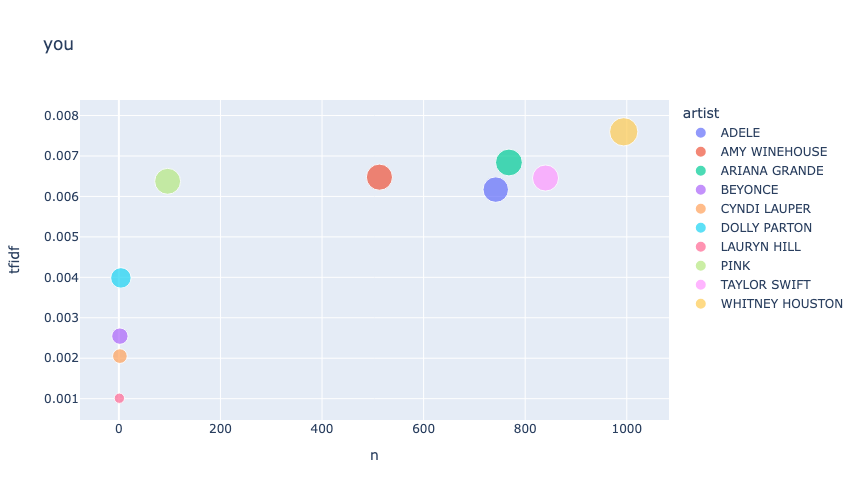

In [116]:
top_words_in_songs('you')

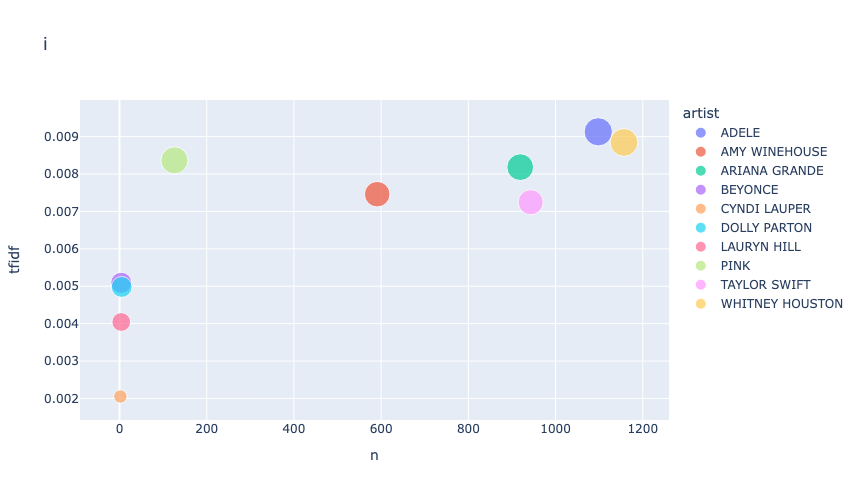

In [99]:
top_words_in_songs('i')

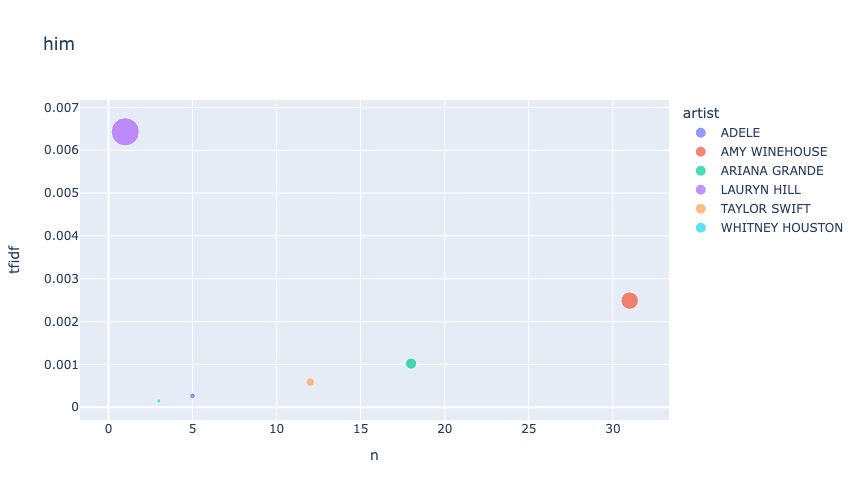

In [100]:
top_words_in_songs('him')

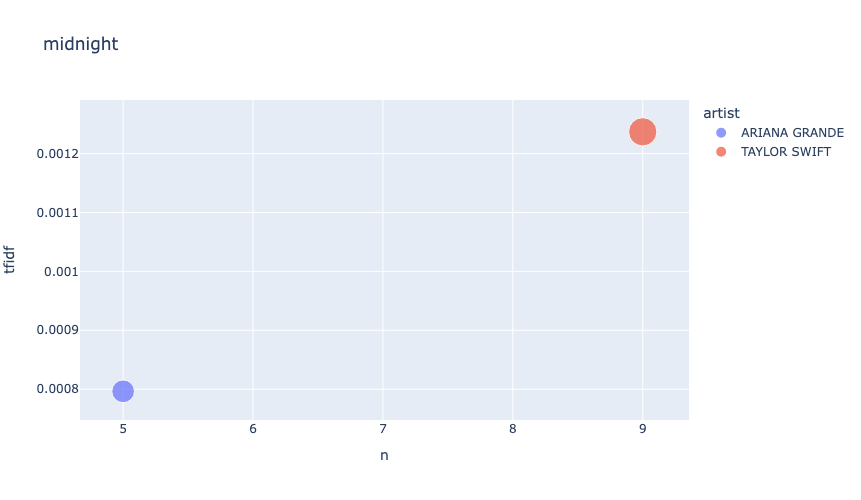

In [101]:
top_words_in_songs('midnight')

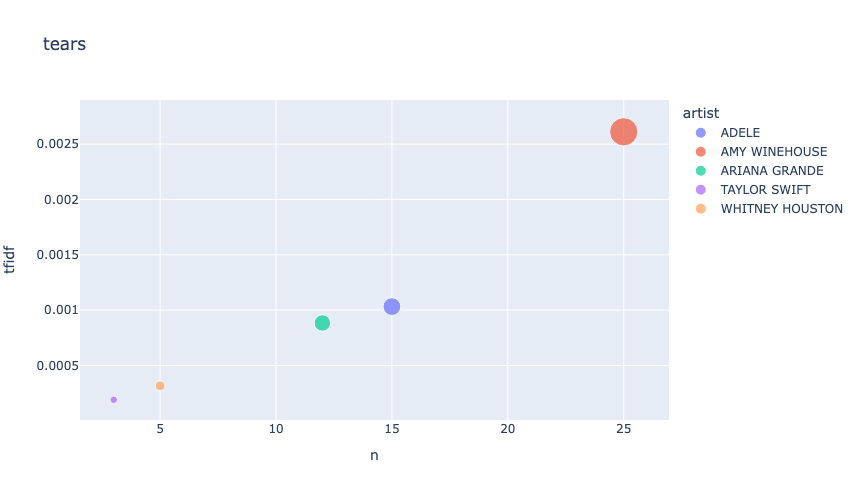

In [102]:
top_words_in_songs('tears')

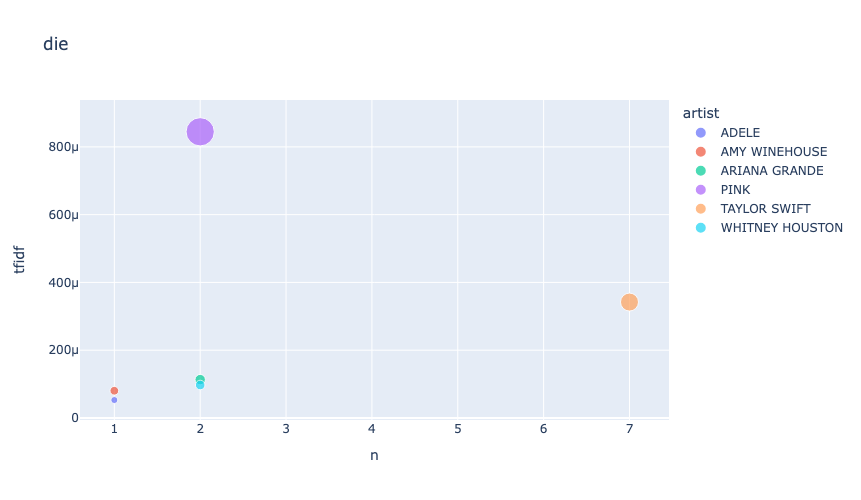

In [104]:
top_words_in_songs('die')

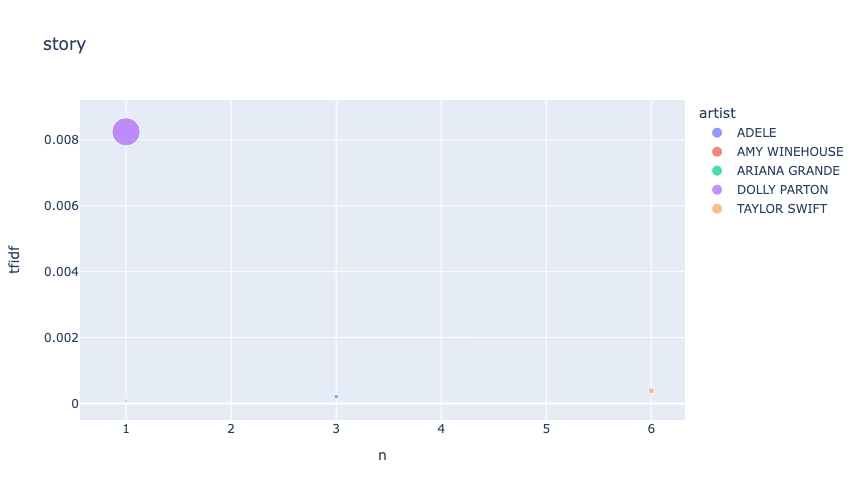

In [105]:
top_words_in_songs('story')

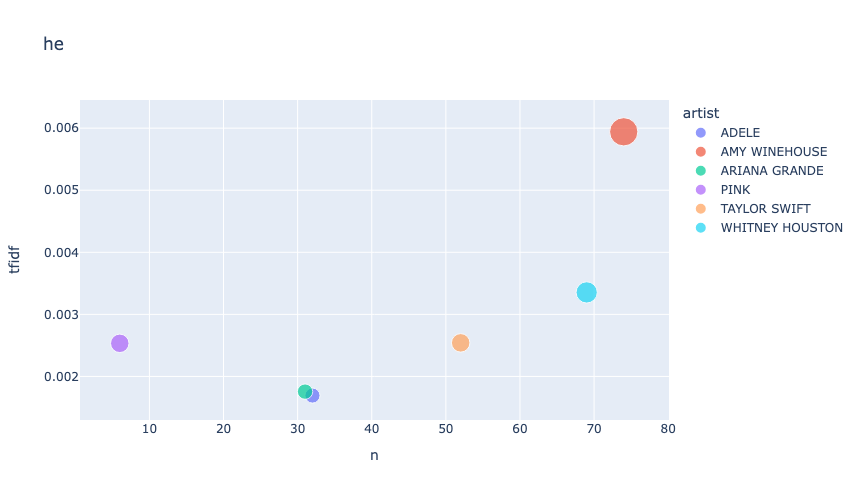

In [106]:
top_words_in_songs('he')

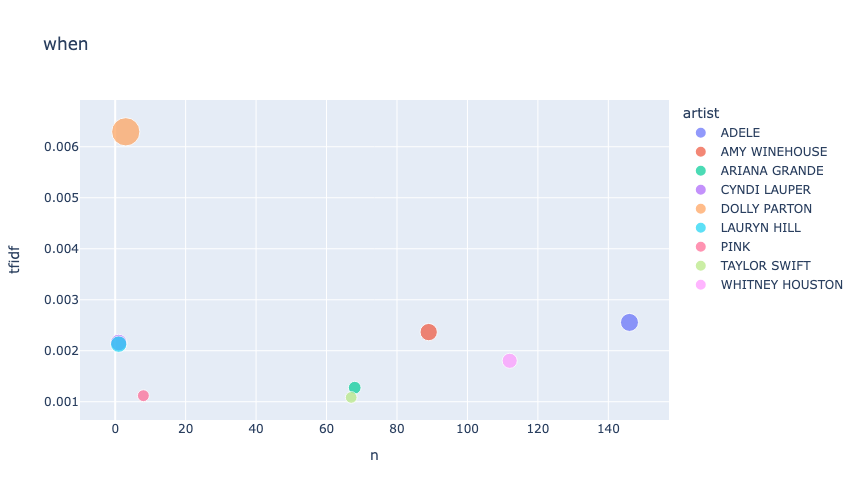

In [108]:
top_words_in_songs('when')

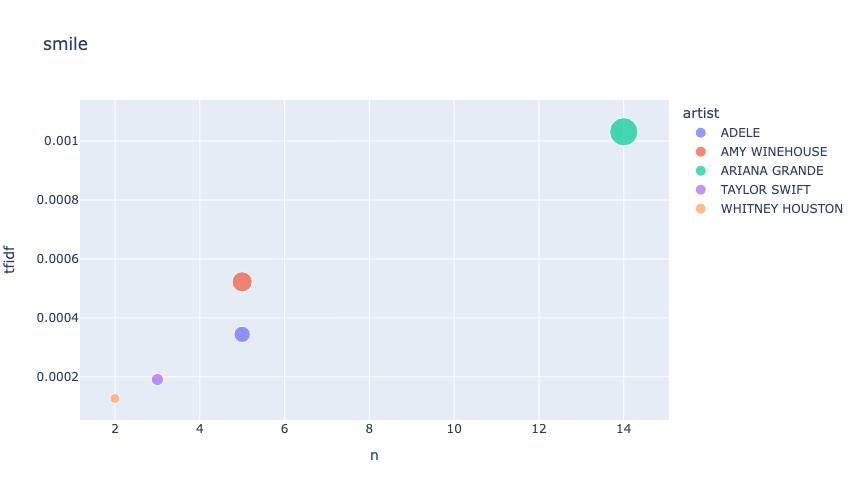

In [111]:
top_words_in_songs('smile')

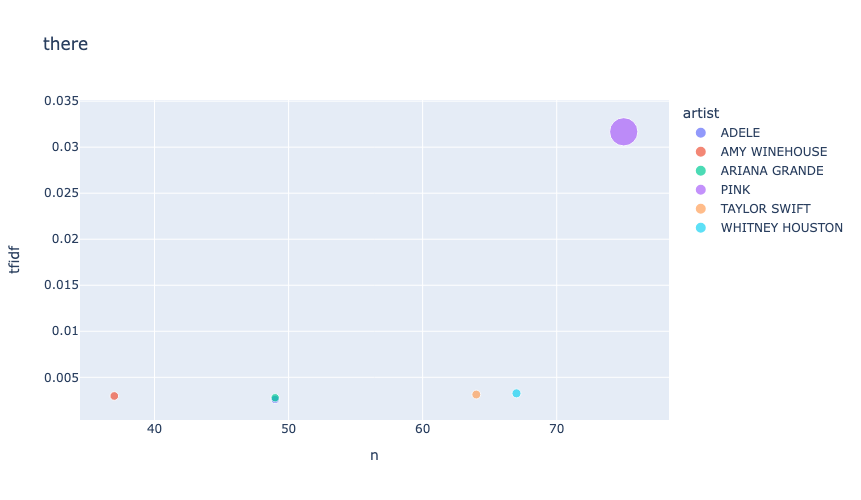

In [112]:
top_words_in_songs('there')

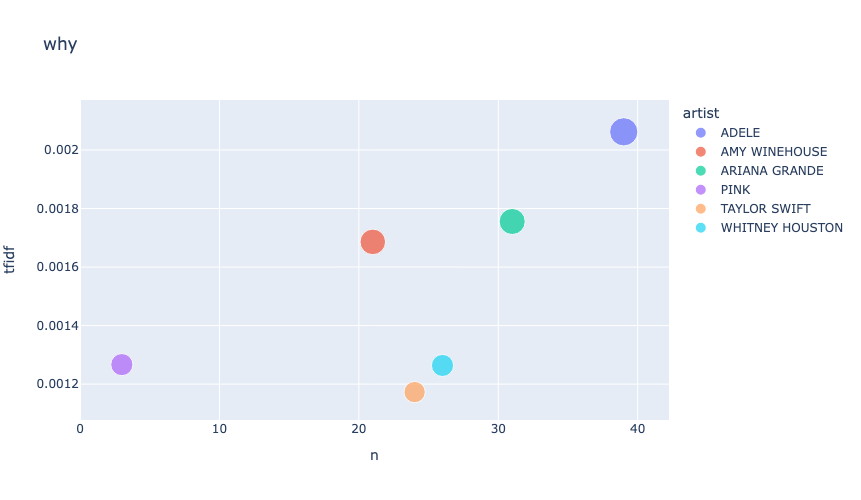

In [117]:
top_words_in_songs('why')

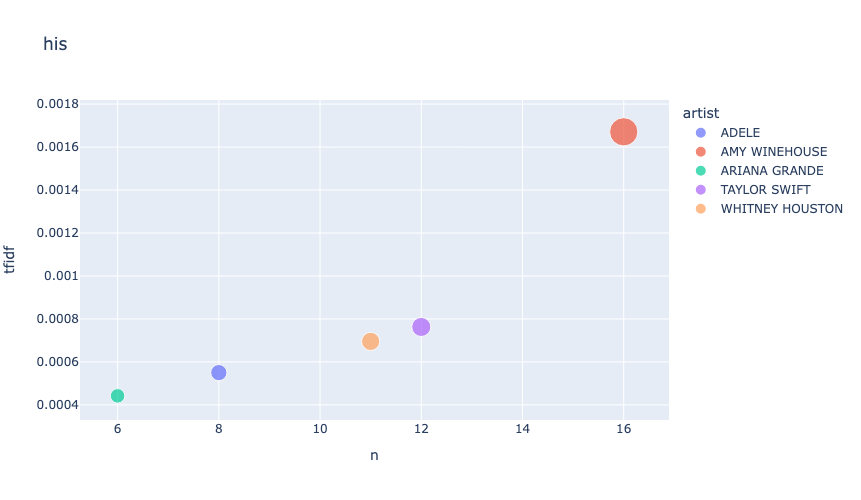

In [119]:
top_words_in_songs('his')

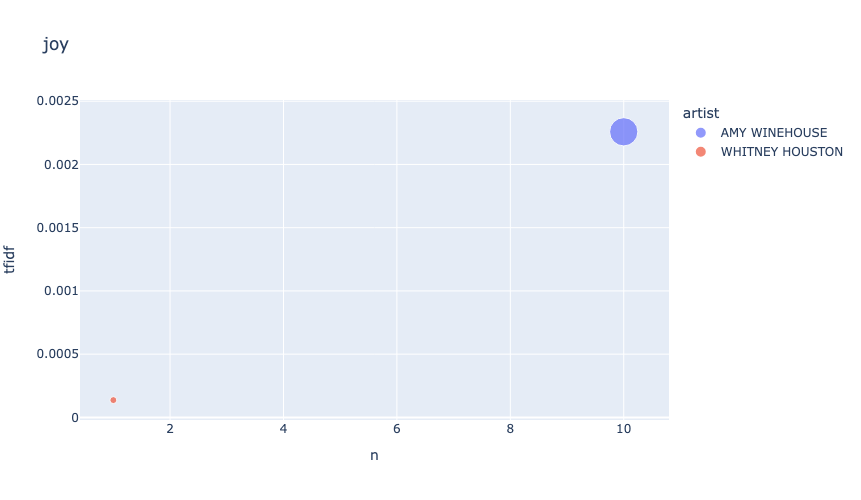

In [120]:
top_words_in_songs('joy')

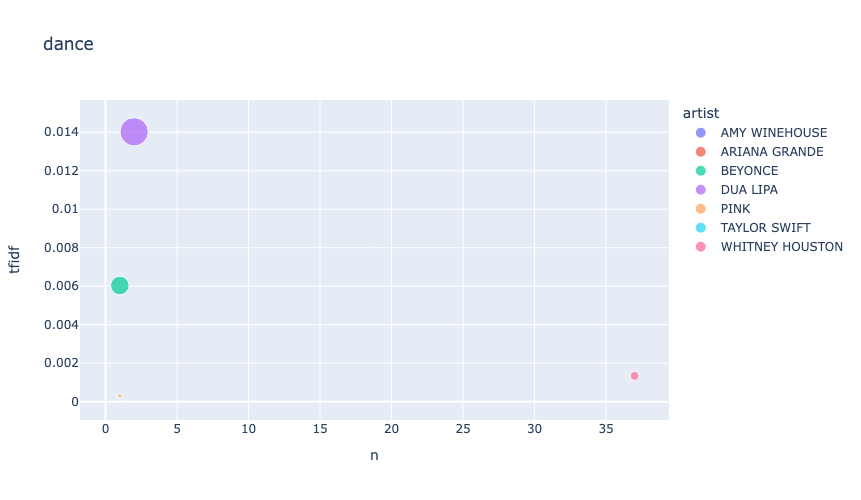

In [122]:
top_words_in_songs('dance')

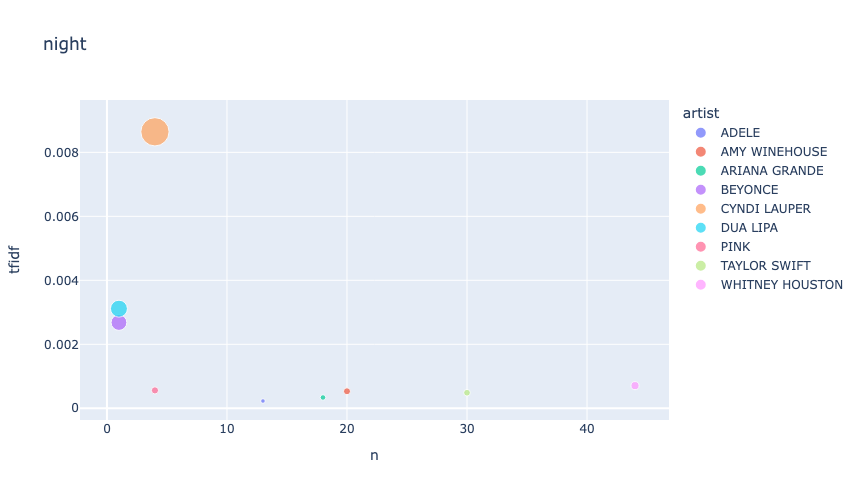

In [123]:
top_words_in_songs('night')

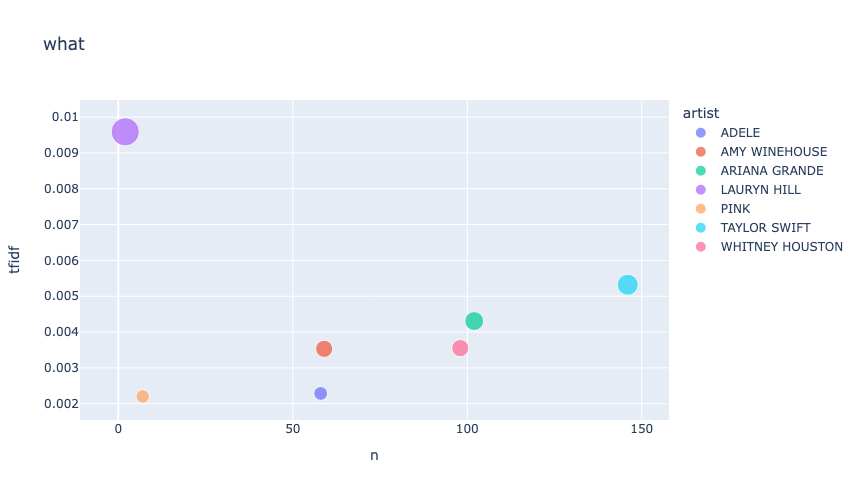

In [124]:
top_words_in_songs('what')

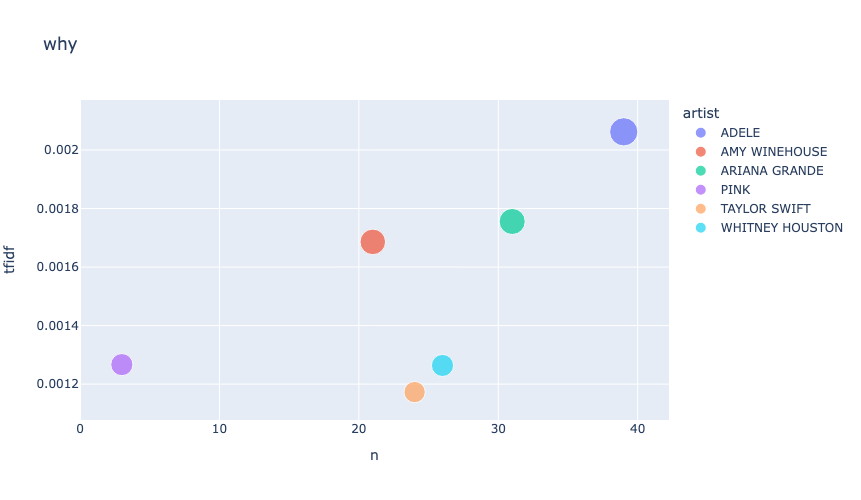

In [125]:
top_words_in_songs('why')

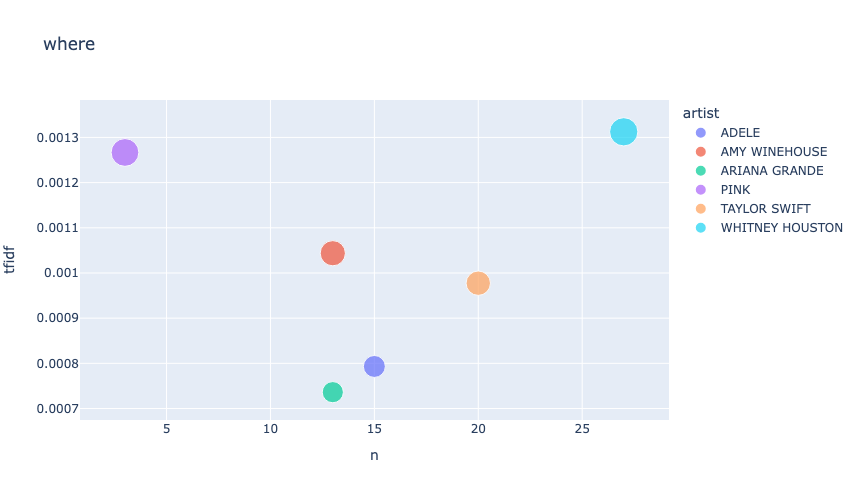

In [126]:
top_words_in_songs('where')

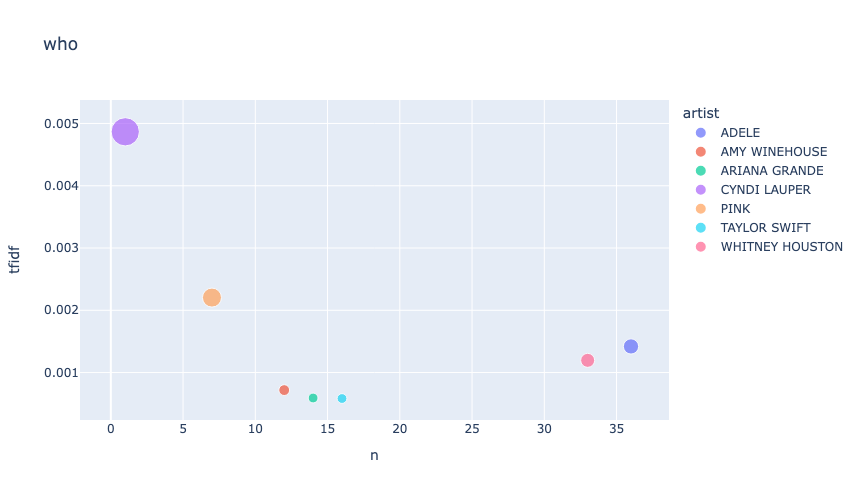

In [127]:
top_words_in_songs('who')

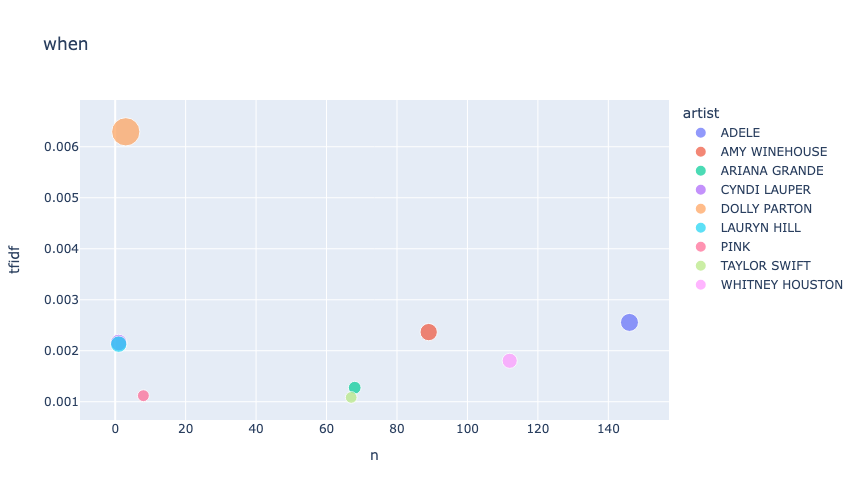

In [129]:
top_words_in_songs('when')

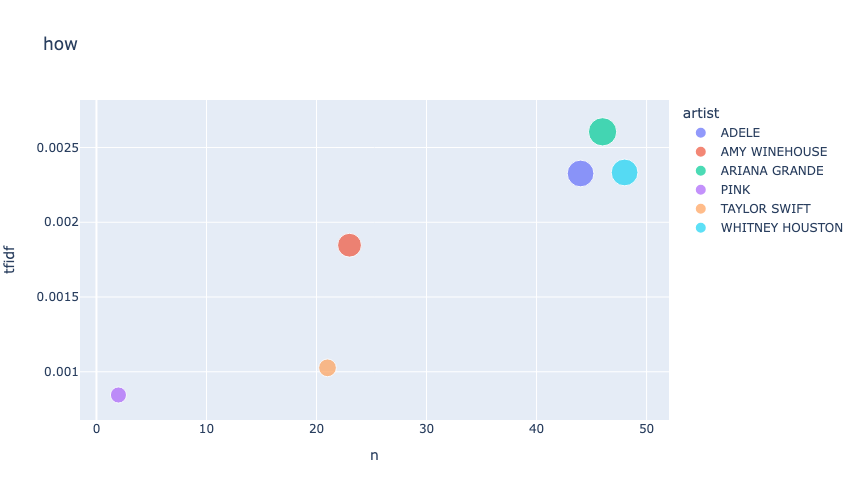

In [130]:
top_words_in_songs('how')